### Predicting Wine Quality Using Machine Learning: An Exploratory Study and Model Comparison

- Group: 4
- Names: Hemlatha Kaur Saran, George David Asirvatharaj, Raminder Singh
- Module: Probability and Statistics for Artificial Intelligence
- Date: 20/06/2025

#### Local Development Env. Setup
1.	Install python: 3.11.3
2.	Installed VSCode
3.	Add Python and jupyter extension
4.	Set kernel
5.	conda install -n base ipykernel jupyter
6.	conda -V >> conda 23.5.2
7.	pip install jupyter notebook pandas numpy matplotlib scipy scikit-learn pandoc nbconvert[webpdf] nbconvert notebook-as-pdf seaborn xgboost shap openpyxl
8.	run >> jupyter notebook
9.	Github url for code repo: https://github.com/ramindersinghusd/m7


In [1]:
# Import necessary libraries for data analysis, visualization, and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression, LogisticRegression  # For regression and classification models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # For ensemble models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For regression evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # For classification evaluation metrics
from xgboost import XGBRegressor, XGBClassifier  # For XGBoost models
import shap  # For model interpretability

In [2]:
# Load the wine quality dataset from an Excel file
# The dataset contains physicochemical properties and quality ratings for white wines
data = pd.read_excel('winequality-white123.xlsx')

In [3]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

# 1. Data Cleaning/Preparation
# Check for missing values in the dataset to ensure data quality
print("\nChecking for missing values:")
print(data.isnull().sum())  # Confirm no missing data

# Separate features (X) and target variable (y)
X = data.drop('quality', axis=1)  # Features: all columns except 'quality'
y = data['quality']  # Target: wine quality rating

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [4]:
# Option 1: Regression (predict actual quality)
# Option 2: Classification (Good vs Bad wine based on threshold quality >= 7)

# Define a binary classification target: Good (quality >= 7) vs Bad (quality < 7)
quality_threshold = 7
y_class = (y >= quality_threshold).astype(int)  # 1 = Good, 0 = Bad

# Feature Scaling: Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split data into training and test sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)


In [5]:
# 2. Exploratory Data Analysis (EDA)
# Display summary statistics for each feature to understand data distribution and central tendency
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000         

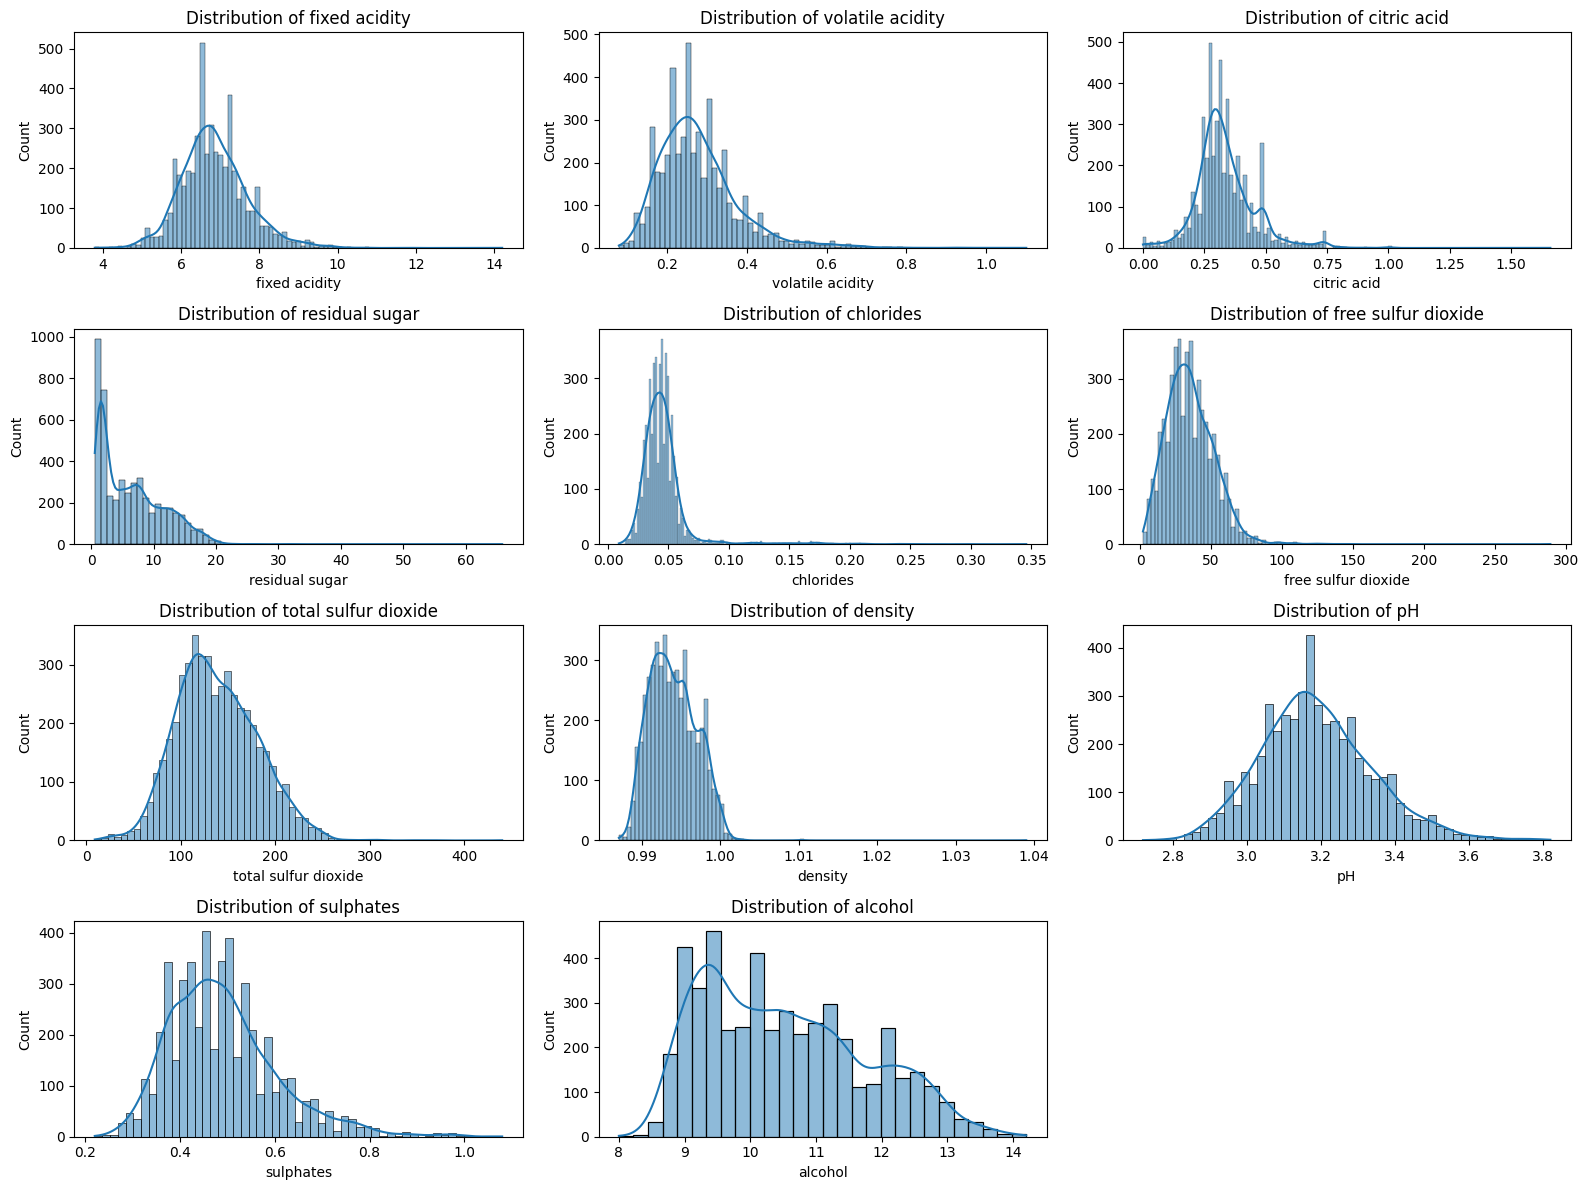

In [6]:
# Plot the distribution of each feature to visualize their spread and detect outliers
features = X.columns
plt.figure(figsize=(16,12))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


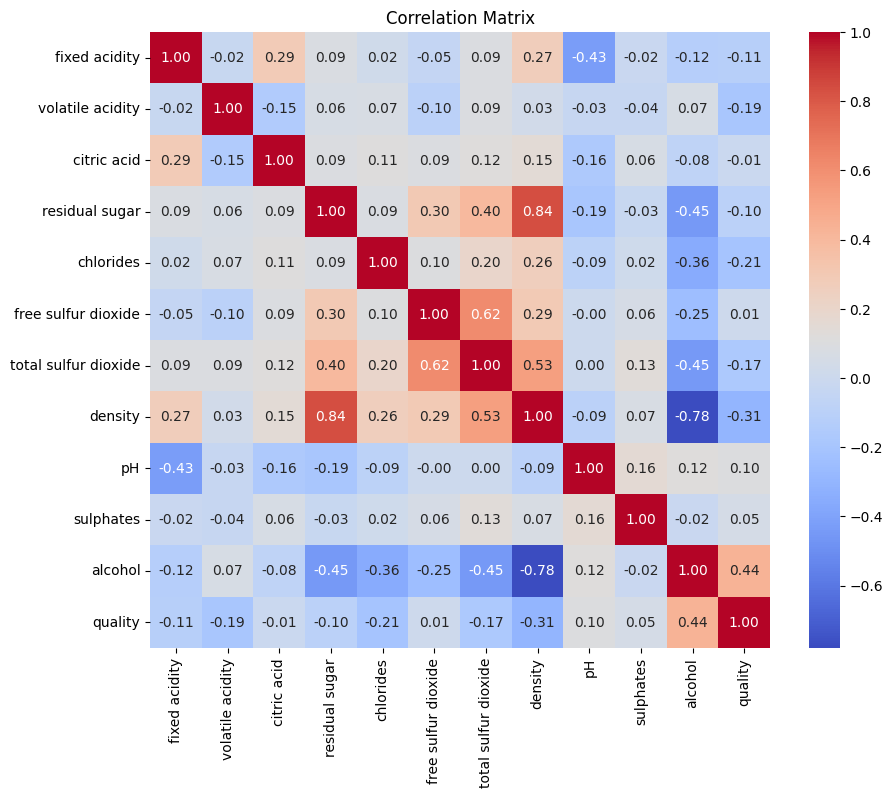

In [7]:
# Plot the correlation matrix to examine relationships between features and with the target variable
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


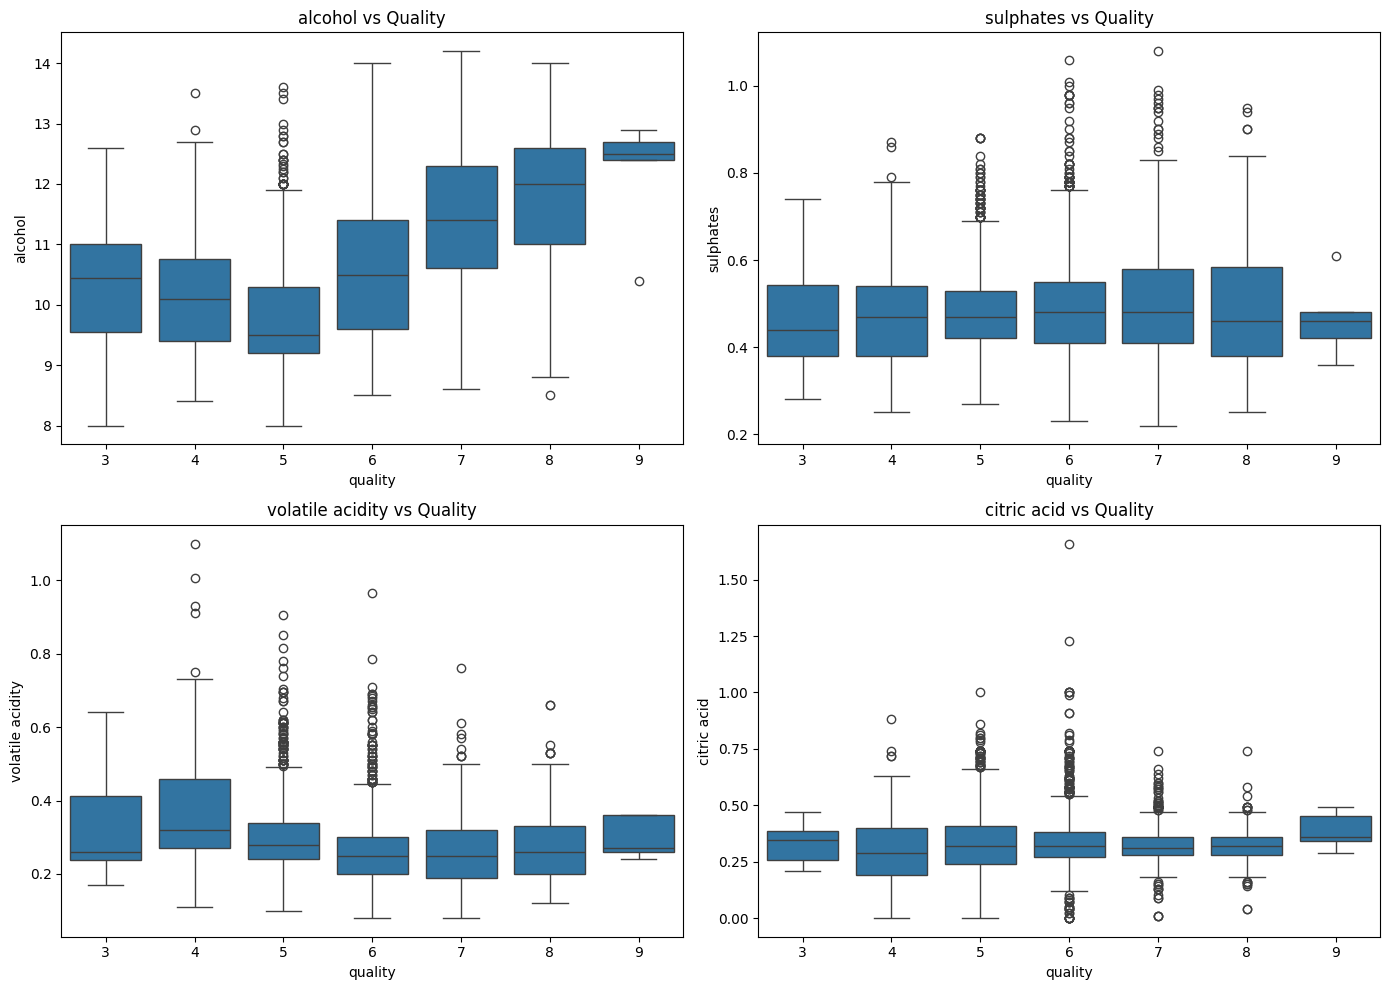

In [8]:
# Create boxplots to visualize the relationship between wine quality and key features
key_features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']
plt.figure(figsize=(14,10))
for i, feature in enumerate(key_features):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='quality', y=feature, data=data)
    plt.title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()

In [9]:
# 3. Model Selection and Training
# Define Regression models to predict wine quality as a continuous variable
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, eval_metric='rmse')
}

In [10]:
# Train and evaluate each regression model, reporting key performance metrics
print("\nRegression Model Performance:")
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)  # Train the model
    y_pred = model.predict(X_test_reg)  # Predict on test set
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))  # Root Mean Squared Error
    mae = mean_absolute_error(y_test_reg, y_pred)  # Mean Absolute Error
    r2 = r2_score(y_test_reg, y_pred)  # R-squared score
    print(f"{name} - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")


Regression Model Performance:
Linear Regression - RMSE: 0.754, MAE: 0.586, R²: 0.265
Random Forest - RMSE: 0.590, MAE: 0.419, R²: 0.551
XGBoost - RMSE: 0.617, MAE: 0.439, R²: 0.509


In [11]:
# Define classification models to predict if a wine is 'Good' or 'Bad'
models_clf = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) #throw warning >=1.7.0
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [12]:
# Train and evaluate each classification model, reporting accuracy, precision, recall, and F1-score
print("\nClassification Model Performance:")
for name, model in models_clf.items():
    model.fit(X_train_clf, y_train_clf)  # Train the model
    y_pred = model.predict(X_test_clf)  # Predict on test set
    acc = accuracy_score(y_test_clf, y_pred)  # Accuracy
    prec = precision_score(y_test_clf, y_pred)  # Precision
    rec = recall_score(y_test_clf, y_pred)  # Recall
    f1 = f1_score(y_test_clf, y_pred)  # F1-score
    print(f"{name} - Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-score: {f1:.3f}")


Classification Model Performance:
Logistic Regression - Accuracy: 0.787, Precision: 0.582, Recall: 0.282, F1-score: 0.380
Random Forest - Accuracy: 0.893, Precision: 0.859, Recall: 0.643, F1-score: 0.736
XGBoost - Accuracy: 0.883, Precision: 0.792, Recall: 0.670, F1-score: 0.726


In [13]:
# Generate and display the confusion matrix for the best classifier (Random Forest)
best_clf = RandomForestClassifier(random_state=42)
best_clf.fit(X_train_clf, y_train_clf)
y_pred_best = best_clf.predict(X_test_clf)
cm = confusion_matrix(y_test_clf, y_pred_best)
print("\nConfusion Matrix for Random Forest Classifier:")
print(cm)


Confusion Matrix for Random Forest Classifier:
[[729  24]
 [ 81 146]]


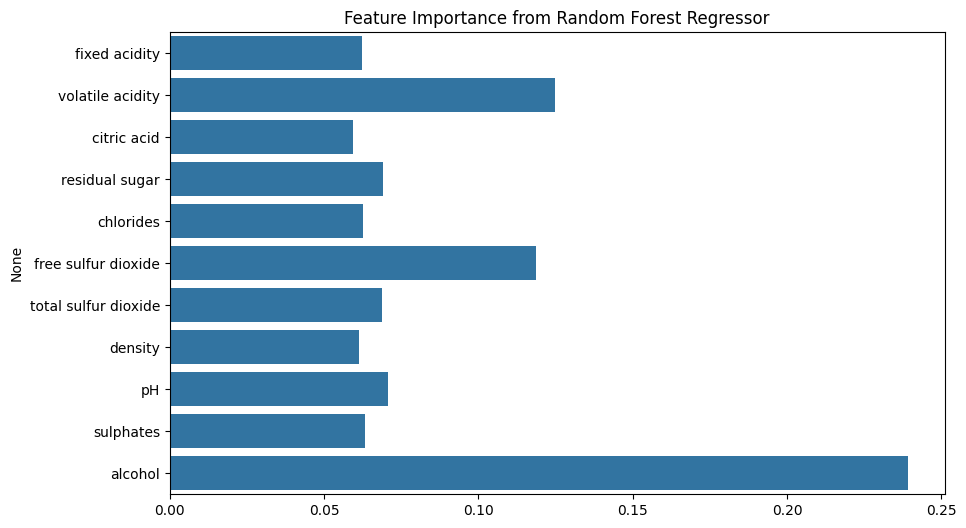

In [14]:
# 4. Feature Importance (Random Forest Regressor example)
# Fit a Random Forest Regressor and extract feature importances
best_reg = RandomForestRegressor(random_state=42)
best_reg.fit(X_train_reg, y_train_reg)
importances = best_reg.feature_importances_

# Visualize feature importances using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

In [15]:
# 5. Use SHAP to explain the predictions of the Random Forest Regressor
explainer = shap.TreeExplainer(best_reg)
shap_values = explainer.shap_values(X_test_reg)

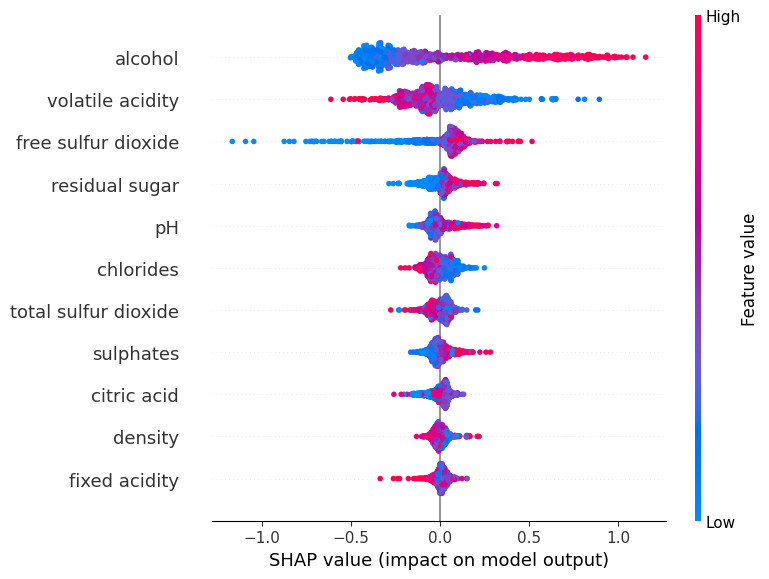

In [16]:
# Generate a SHAP summary plot to visualize feature impact on model output
shap.summary_plot(shap_values, features=X_test_reg, feature_names=features)

# Conclusion

**1. Feature Impact:**
The analysis revealed that certain features, such as alcohol content and volatile acidity, have a significant impact on wine quality. Both feature importance and SHAP analysis consistently highlighted these variables as key drivers in predicting wine quality.

**2. Model Performance:**
Ensemble models like Random Forest and XGBoost outperformed simpler models in both regression and classification tasks, demonstrating the value of using advanced machine learning techniques for complex, real-world datasets like wine quality prediction.
